# Ứng dụng AI đánh giá phản hồi học phần từ sinh viên theo cảm xúc và chủ đề

Đề tài này nhằm xây dựng một hệ thống sử dụng AI để phân tích phản hồi học phần của sinh viên, xác định cảm xúc (tích cực, tiêu cực, trung lập) và phân loại chủ đề phản hồi (giảng viên, nội dung học phần, cơ sở vật chất, v.v.). Dữ liệu sử dụng là bộ `uitnlp/vietnamese_students_feedback` từ Hugging Face.

## Mục tiêu
- Phân loại cảm xúc của phản hồi.
- Phân loại chủ đề phản hồi.
- Đánh giá hiệu quả mô hình và demo dự đoán.


In [1]:
import datasets
from vietnamese_feedback import VietnameseStudentsFeedback

# Initialize and prepare the dataset
vsf = VietnameseStudentsFeedback()
vsf.download_and_prepare()

# Load the dataset
ds = vsf.as_dataset()

# Convert to pandas dataframes for easier handling
import pandas as pd
train_df = pd.DataFrame(ds["train"])
validation_df = pd.DataFrame(ds["validation"])
test_df = pd.DataFrame(ds["test"])

print("Dataset structure:")
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(validation_df)}")
print(f"Test samples: {len(test_df)}")
print("\nSample data:")
print(train_df.head())

/Users/ducqhle/Documents/AI_Thinking_DoAn/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/ducqhle/Documents/AI_Thinking_DoAn/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset structure:
Training samples: 11426
Validation samples: 1583
Test samples: 3166

Sample data:
                                            sentence  sentiment  topic
0                          slide giáo trình đầy đủ .          2      1
1     nhiệt tình giảng dạy , gần gũi với sinh viên .          2      0
2               đi học đầy đủ full điểm chuyên cần .          0      1
3  chưa áp dụng công nghệ thông tin và các thiết ...          0      0
4  thầy giảng bài hay , có nhiều bài tập ví dụ ng...          2      0



Detailed Dataset Statistics:

Sentiment Distribution:
Sentiment 2: 5643 samples (49.39%)
Sentiment 0: 5325 samples (46.60%)
Sentiment 1: 458 samples (4.01%)

Topic Distribution:
Topic 0: 8166 samples (71.47%)
Topic 1: 2201 samples (19.26%)
Topic 3: 562 samples (4.92%)
Topic 2: 497 samples (4.35%)


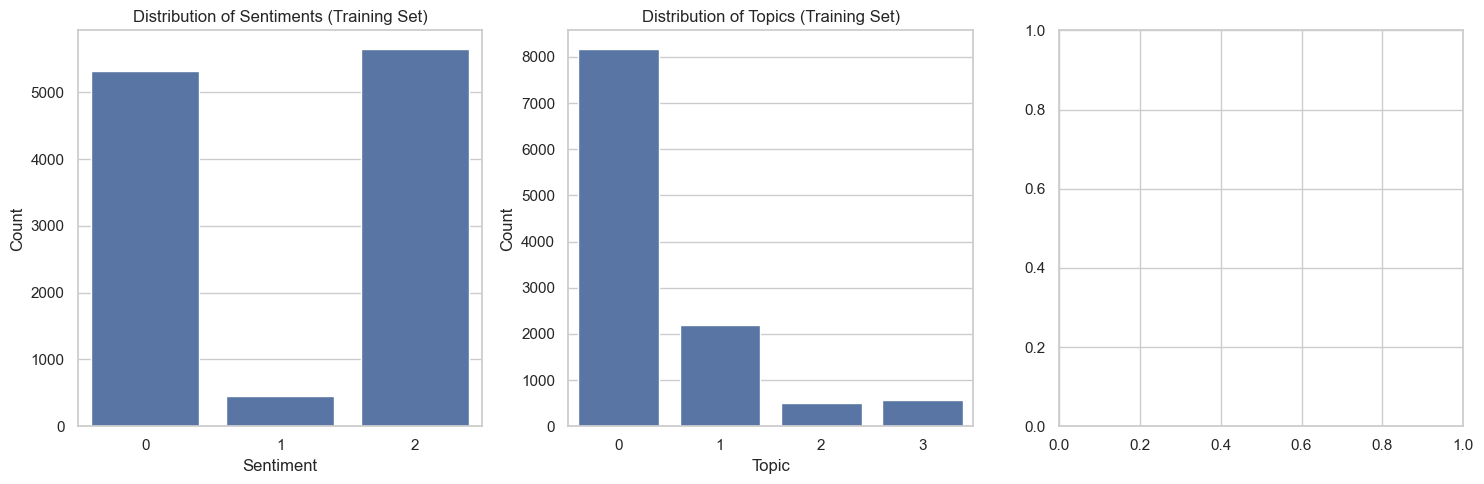

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style using seaborn's modern approach
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))

# 1. Distribution of sentiments in the training set
plt.subplot(131)
sns.countplot(data=train_df, x='sentiment')
plt.title('Distribution of Sentiments (Training Set)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# 2. Distribution of topics in the training set
plt.subplot(132)
sns.countplot(data=train_df, x='topic')
plt.title('Distribution of Topics (Training Set)')
plt.xlabel('Topic')
plt.ylabel('Count')

# 3. Print detailed statistics
plt.subplot(133)
sentiment_stats = train_df['sentiment'].value_counts()
topic_stats = train_df['topic'].value_counts()

print("\nDetailed Dataset Statistics:")
print("\nSentiment Distribution:")
for sentiment, count in sentiment_stats.items():
    print(f"Sentiment {sentiment}: {count} samples ({count/len(train_df)*100:.2f}%)")

print("\nTopic Distribution:")
for topic, count in topic_stats.items():
    print(f"Topic {topic}: {count} samples ({count/len(train_df)*100:.2f}%)")

plt.tight_layout()
plt.show()

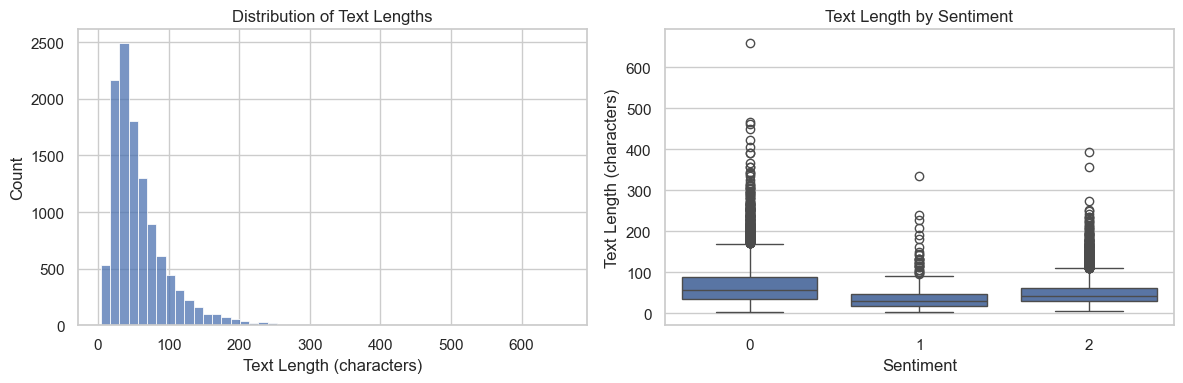


Text Length Statistics:
Mean length: 59.08 characters
Median length: 47.00 characters
Min length: 4.00 characters
Max length: 660.00 characters

Example texts of different lengths:

Min length example (4 chars):
Text: tệ .
Sentiment: 0
Topic: 3

Mean length example (59 chars):
Text: thầy giảng bài hay , có nhiều bài tập ví dụ ngay trên lớp .
Sentiment: 2
Topic: 0

Max length example (660 chars):
Text: thầy cho nghỉ quá nhiểu mà không sắp xếp giáo viên dạy thay , vì vậy dẫn tới việc học bù liên tiếp vào những ngày cuối , khi mà chúng em phải ôn tập những kiến thức khác , vẫn có một số buổi thông báo học bù nhưng sau đó lại thông báo nghỉ đột đột , dẫn tới bị ùn kiến thức , không ai ăn được một vạ gạo một ngày cả tên môn học là " nhập môn công nghệ phần mềm " nhưng kiến thức và cách đánh giá năng lực học sinh quá nặng nề , nếu là sinh viên các khoa như phần mềm , hệ thống thì có thể hiểu được , nhưng với những sinh viên khoa khoa học máy tính như chúng em vì đây là môn học bắt buộc thì 

In [29]:
# Analyze text length distribution
train_df['text_length'] = train_df['sentence'].str.len()

plt.figure(figsize=(12, 4))

# Plot text length distribution
plt.subplot(121)
sns.histplot(data=train_df, x='text_length', bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Count')

# Box plot of text length by sentiment
plt.subplot(122)
sns.boxplot(data=train_df, x='sentiment', y='text_length')
plt.title('Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length (characters)')

plt.tight_layout()
plt.show()

# Print text length statistics
print("\nText Length Statistics:")
length_stats = train_df['text_length'].describe()
print(f"Mean length: {length_stats['mean']:.2f} characters")
print(f"Median length: {length_stats['50%']:.2f} characters")
print(f"Min length: {length_stats['min']:.2f} characters")
print(f"Max length: {length_stats['max']:.2f} characters")

# Show some examples of different lengths
print("\nExample texts of different lengths:")
for length_type in ['min', 'mean', 'max']:
    idx = (train_df['text_length'] - length_stats[length_type]).abs().idxmin()
    print(f"\n{length_type.capitalize()} length example ({train_df.loc[idx, 'text_length']} chars):")
    print(f"Text: {train_df.loc[idx, 'sentence']}")
    print(f"Sentiment: {train_df.loc[idx, 'sentiment']}")
    print(f"Topic: {train_df.loc[idx, 'topic']}")

In [30]:
import re
import pandas as pd
from underthesea import word_tokenize  # Vietnamese text processing

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove newlines and extra spaces
    text = re.sub(r"[\n\r]", " ", text)
    # Keep Vietnamese characters and basic punctuation
    text = re.sub(r"[^a-zA-ZÀ-ỹ\s.,!?]", "", text)
    # Tokenize Vietnamese text
    tokens = word_tokenize(text)
    # Join tokens back together
    text = " ".join(tokens)
    return text.strip()

# Apply preprocessing to the datasets
train_df['processed_text'] = train_df['sentence'].apply(preprocess_text)
validation_df['processed_text'] = validation_df['sentence'].apply(preprocess_text)
test_df['processed_text'] = test_df['sentence'].apply(preprocess_text)

print("Sample processed text:")
for original, processed in zip(train_df['sentence'][:2], train_df['processed_text'][:2]):
    print(f"Original: {original}")
    print(f"Processed: {processed}\n")

Sample processed text:
Original: slide giáo trình đầy đủ .
Processed: slide giáo trình đầy đủ .

Original: nhiệt tình giảng dạy , gần gũi với sinh viên .
Processed: nhiệt tình giảng dạy , gần gũi với sinh viên .



In [31]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Create dataset objects
def create_dataset(df):
    return Dataset.from_dict({
        'text': df['processed_text'],
        'label': df['sentiment']
    })

train_dataset = create_dataset(train_df)
val_dataset = create_dataset(validation_df)
test_dataset = create_dataset(test_df)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model_emotion = AutoModelForSequenceClassification.from_pretrained(
    "vinai/phobert-base", 
    num_labels=3  # negative, neutral, positive
)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding="max_length",
        truncation=True,
        max_length=128
    )

# Tokenize datasets
train_tokenized = train_dataset.map(tokenize_function, batched=True)
val_tokenized = val_dataset.map(tokenize_function, batched=True)
test_tokenized = test_dataset.map(tokenize_function, batched=True)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results_emotion",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs_emotion",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
)

# Initialize trainer
trainer_emotion = Trainer(
    model=model_emotion,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=val_tokenized,
    compute_metrics=compute_metrics,
)

# Train the model
print("Training emotion classification model...")
trainer_emotion.train()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 3166/3166 [00:00<00:00, 9995.58 examples/s] 


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>=0.26.0'`

In [ ]:
# Create dataset objects for topic classification
def create_topic_dataset(df):
    return Dataset.from_dict({
        'text': df['processed_text'],
        'label': df['topic']
    })

train_topic_dataset = create_topic_dataset(train_df)
val_topic_dataset = create_topic_dataset(validation_df)
test_topic_dataset = create_topic_dataset(test_df)

# Initialize topic classification model
model_topic = AutoModelForSequenceClassification.from_pretrained(
    "vinai/phobert-base", 
    num_labels=4  # lecturer, training_program, facility, others
)

# Tokenize datasets for topic classification
train_topic_tokenized = train_topic_dataset.map(tokenize_function, batched=True)
val_topic_tokenized = val_topic_dataset.map(tokenize_function, batched=True)
test_topic_tokenized = test_topic_dataset.map(tokenize_function, batched=True)

# Training arguments for topic classification
training_args_topic = TrainingArguments(
    output_dir="./results_topic",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs_topic",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
)

# Initialize topic trainer
trainer_topic = Trainer(
    model=model_topic,
    args=training_args_topic,
    train_dataset=train_topic_tokenized,
    eval_dataset=val_topic_tokenized,
    compute_metrics=compute_metrics,
)

# Train topic classification model
print("Training topic classification model...")
trainer_topic.train()

In [ ]:
# Đánh giá mô hình cảm xúc
emotion_metrics = trainer_emotion.evaluate()
print("Emotion Classification Metrics:", emotion_metrics)

# Đánh giá mô hình chủ đề
topic_metrics = trainer_topic.evaluate()
print("Topic Classification Metrics:", topic_metrics)


In [ ]:
def predict_emotion(text):
    # Preprocess the text
    processed_text = preprocess_text(text)
    # Tokenize
    inputs = tokenizer(processed_text, return_tensors="pt", truncation=True, padding=True)
    # Get prediction
    outputs = model_emotion(**inputs)
    predicted = torch.argmax(outputs.logits, dim=1)
    # Map to labels
    emotion_labels = ["negative", "neutral", "positive"]
    return emotion_labels[predicted.item()]

def predict_topic(text):
    # Preprocess the text
    processed_text = preprocess_text(text)
    # Tokenize
    inputs = tokenizer(processed_text, return_tensors="pt", truncation=True, padding=True)
    # Get prediction
    outputs = model_topic(**inputs)
    predicted = torch.argmax(outputs.logits, dim=1)
    # Map to labels
    topic_labels = ["lecturer", "training_program", "facility", "others"]
    return topic_labels[predicted.item()]

# Example predictions
sample_texts = [
    "Giảng viên giảng bài rất dễ hiểu và nhiệt tình.",
    "Phòng học thiếu ánh sáng và quá nóng.",
    "Nội dung môn học rất hữu ích cho công việc."
]

print("Example predictions:")
for text in sample_texts:
    print(f"\nText: {text}")
    print(f"Emotion: {predict_emotion(text)}")
    print(f"Topic: {predict_topic(text)}")